In [1]:
import os
import socket
from typing import Union, Optional

import nnunetv2
import torch.cuda
import torch.distributed as dist
import torch.multiprocessing as mp
from batchgenerators.utilities.file_and_folder_operations import join, isfile, load_json
from nnunetv2.paths import nnUNet_preprocessed
from nnunetv2.run.load_pretrained_weights import load_pretrained_weights
from nnunetv2.training.nnUNetTrainer.nnUNetTrainer import nnUNetTrainer
from nnunetv2.utilities.dataset_name_id_conversion import maybe_convert_to_dataset_name
from nnunetv2.utilities.find_class_by_name import recursive_find_python_class
from torch.backends import cudnn

from nnunetv2.run.run_training import find_free_network_port, get_trainer_from_args, maybe_load_checkpoint

pretrained = os.path.join(os.environ['nnUNet_results'], 'Dataset213_ONKOI-all-from-208/nnUNetTrainer_noMirroringAxis2redRot__nnUNetPlans__3d_fullres_modal1/fold_0/checkpoint_best.pth')


dataset_name_or_id: Union[str, int] = '213'
configuration: str = '3d_fullres_modal1'
fold: Union[int, str] = 0
trainer_class_name: str = 'nnUNetTrainer_noMirroringAxis2redRot'
plans_identifier: str = 'nnUNetPlans'
pretrained_weights: Optional[str] = pretrained
num_gpus: int = 1
use_compressed_data: bool = False
export_validation_probabilities: bool = False
continue_training: bool = False
only_run_validation: bool = False
disable_checkpointing: bool = False
device: torch.device = torch.device('cuda')
num_epochs: int = 1000

if isinstance(fold, str):
    if fold != 'all':
        try:
            fold = int(fold)
        except ValueError as e:
            print(f'Unable to convert given value for fold to int: {fold}. fold must bei either "all" or an integer!')
            raise e

nnunet_trainer = get_trainer_from_args(dataset_name_or_id, configuration, fold, trainer_class_name,
                                        plans_identifier, use_compressed_data, device=device, num_epochs=num_epochs)

if disable_checkpointing:
    nnunet_trainer.disable_checkpointing = disable_checkpointing

assert not (continue_training and only_run_validation), f'Cannot set --c and --val flag at the same time. Dummy.'

maybe_load_checkpoint(nnunet_trainer, continue_training, only_run_validation, pretrained_weights)

if torch.cuda.is_available():
    cudnn.deterministic = False
    cudnn.benchmark = True

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda:0


RuntimeError: Requested configuration 3d_fullres_modal1 not found in plans. Available configurations: ['2d', '3d_lowres', '3d_fullres', '3d_cascade_fullres', '3d_fullres_SepEncCMX', '3d_fullres_SepEncCMXfull', '3d_fullres_SepEncCMXv2']

In [ ]:
from torchvision.models.feature_extraction import create_feature_extractor
from torchvision.models.feature_extraction import get_graph_node_names
get_graph_node_names(nnunet_trainer.network)

(['x',
  'getitem',
  'encoder.stages.0.0.convs.0.conv',
  'encoder.stages.0.0.convs.0.norm',
  'encoder.stages.0.0.convs.0.nonlin',
  'encoder.stages.0.0.convs.1.conv',
  'encoder.stages.0.0.convs.1.norm',
  'encoder.stages.0.0.convs.1.nonlin',
  'encoder.stages.1.0.convs.0.conv',
  'encoder.stages.1.0.convs.0.norm',
  'encoder.stages.1.0.convs.0.nonlin',
  'encoder.stages.1.0.convs.1.conv',
  'encoder.stages.1.0.convs.1.norm',
  'encoder.stages.1.0.convs.1.nonlin',
  'encoder.stages.2.0.convs.0.conv',
  'encoder.stages.2.0.convs.0.norm',
  'encoder.stages.2.0.convs.0.nonlin',
  'encoder.stages.2.0.convs.1.conv',
  'encoder.stages.2.0.convs.1.norm',
  'encoder.stages.2.0.convs.1.nonlin',
  'encoder.stages.3.0.convs.0.conv',
  'encoder.stages.3.0.convs.0.norm',
  'encoder.stages.3.0.convs.0.nonlin',
  'encoder.stages.3.0.convs.1.conv',
  'encoder.stages.3.0.convs.1.norm',
  'encoder.stages.3.0.convs.1.nonlin',
  'encoder.stages.4.0.convs.0.conv',
  'encoder.stages.4.0.convs.0.norm',
  

In [ ]:
import numpy as np
nnunet_trainer.on_train_start()
nnunet_trainer.on_validation_epoch_start()
# data = next(nnunet_trainer.dataloader_val)

fn = '/media/medical/gasperp/projects/nnUnetv2_clone/nnUNet/nnunetv2/inference/test_patch.npz'
# with open(fn, 'wb') as f:
#     np.savez(f, data=data['data'].cpu().numpy(), target=data['target'][0].cpu().numpy())
ddd = np.load(fn)
data = {'data': torch.from_numpy(ddd['data']), 'target': [torch.from_numpy(ddd['target'])]}


This is the configuration used by this training:
Configuration name: 3d_fullres_modal1
 {'data_identifier': 'nnUNetPlans_3d_fullres', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 2, 'patch_size': [40, 192, 224], 'median_image_size_in_voxels': [94.0, 459.5, 466.0], 'spacing': [2.0, 0.5, 0.5], 'normalization_schemes': ['CTNormalization', 'ZScoreNormalization'], 'use_mask_for_norm': [False, False], 'UNet_class_name': 'PlainConvUNet_modal1', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': [2, 2, 2, 2, 2, 2], 'n_conv_per_stage_decoder': [2, 2, 2, 2, 2], 'num_pool_per_axis': [3, 5, 5], 'pool_op_kernel_sizes': [[1, 1, 1], [1, 2, 2], [1, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2]], 'conv_kernel_sizes': [[1, 3, 3], [1, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3]], 'unet_max_num_features': 320, 'resampling_fn_data': 'resample_data_or_seg_to_shape', 'resampling_fn_seg': 'resample_data_or_seg_to_shape', 'resampling_fn_data_kwargs': {'is_seg': False, 'order': 3, 'order_z':

In [ ]:
def setup_hooks(d):
    # Visualize feature maps
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            if isinstance(output, torch.Tensor):
                activation[name] = output.detach().cpu().numpy()
            elif isinstance(output, (tuple, list)):
                activation[name] = [o.detach().cpu().numpy() for o in output]
            else:
                print(f'Unknown output type: {type(output)}')
        return hook

    hooks = []

    hooks.append(nnunet_trainer.network.encoder.stages[0][0].convs[1].register_forward_hook(get_activation('skip0')))
    hooks.append(nnunet_trainer.network.encoder.stages[1][0].convs[1].register_forward_hook(get_activation('skip1')))
    hooks.append(nnunet_trainer.network.encoder.stages[2][0].convs[1].register_forward_hook(get_activation('skip2')))
    hooks.append(nnunet_trainer.network.encoder.stages[3][0].convs[1].register_forward_hook(get_activation('skip3')))
    hooks.append(nnunet_trainer.network.encoder.stages[4][0].convs[1].register_forward_hook(get_activation('skip4')))

    hooks.append(nnunet_trainer.network.decoder.stages[0].convs[1].nonlin.register_forward_hook(get_activation('decoder0')))
    hooks.append(nnunet_trainer.network.decoder.stages[1].convs[1].nonlin.register_forward_hook(get_activation('decoder1')))
    hooks.append(nnunet_trainer.network.decoder.stages[2].convs[1].nonlin.register_forward_hook(get_activation('decoder2')))
    hooks.append(nnunet_trainer.network.decoder.stages[3].convs[1].nonlin.register_forward_hook(get_activation('decoder3')))
    hooks.append(nnunet_trainer.network.decoder.stages[4].convs[1].nonlin.register_forward_hook(get_activation('decoder4')))
    hooks.append(nnunet_trainer.network.decoder.seg_layers[4].register_forward_hook(get_activation('pred_seg')))


    # output = nnunet_trainer.network.encoder(d[:,[0]], d[:,[1]])
    output = nnunet_trainer.network(d)

    for h in hooks:
        h.remove()
        
    return activation

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
"""
nnunet_trainer.network.encoder.stages 0-5
each stage in encoder has two branches: CT and MR 0-1
each branch has a single StackedConvBlocks (double-conv) block, so 0
"""

d = data['data'][[0]].to('cuda:0')
activation = setup_hooks(d)

In [ ]:
for k in list(activation.keys()):
    if isinstance(activation[k], (list, tuple)):
        print(k, len(activation[k]), activation[k][0].shape)
    else:
        print(k, activation[k].shape)

skip0 (1, 32, 40, 192, 224)
skip1 (1, 64, 40, 96, 112)
skip2 (1, 128, 40, 48, 56)
skip3 (1, 256, 20, 24, 28)
skip4 (1, 320, 10, 12, 14)
decoder0 (1, 320, 10, 12, 14)
decoder1 (1, 256, 20, 24, 28)
decoder2 (1, 128, 40, 48, 56)
decoder3 (1, 64, 40, 96, 112)
decoder4 (1, 32, 40, 192, 224)
pred_seg (1, 31, 40, 192, 224)


In [ ]:
[i.shape for i in data['target']]

[torch.Size([2, 1, 40, 192, 224])]

In [ ]:
# write me a function to plot activation maps in two rows, 1. row should be the max projection, 2. row should be the mean projection
# the function should take the activation dict and the name of the layer as input

def plot(activation, t, B, SLC, img):
    fig, axes = plt.subplots(3, len(activation)+2, figsize=(18, 6))

    for i, key in enumerate(activation.keys()):
        if key == 'pred_seg':
            FM = activation[key][B][1:]
        else:
            FM = activation[key][B]
        axes[0,i].imshow(FM.max(0)[SLC], cmap='gray')
        axes[1,i].imshow(FM.mean(0)[SLC], cmap='gray')
        axes[2,i].imshow(FM.std(0)[SLC], cmap='gray')
        axes[0,i].set_title(key)
        
    axes[0,0].set_ylabel('max')
    axes[1,0].set_ylabel('mean')
    axes[2,0].set_ylabel('std')

    axes[0,-2].imshow(t[SLC], cmap='gray')
    axes[1,-2].imshow(t[SLC], cmap='gray')
    axes[2,-2].imshow(t[SLC], cmap='gray')
    
    axes[0,-1].imshow(img[SLC], cmap='gray')
    axes[1,-1].imshow(img[SLC], cmap='gray')
    axes[2,-1].imshow(img[SLC], cmap='gray')
    plt.tight_layout()
    plt.show()

In [ ]:
d.shape

torch.Size([1, 2, 40, 192, 224])

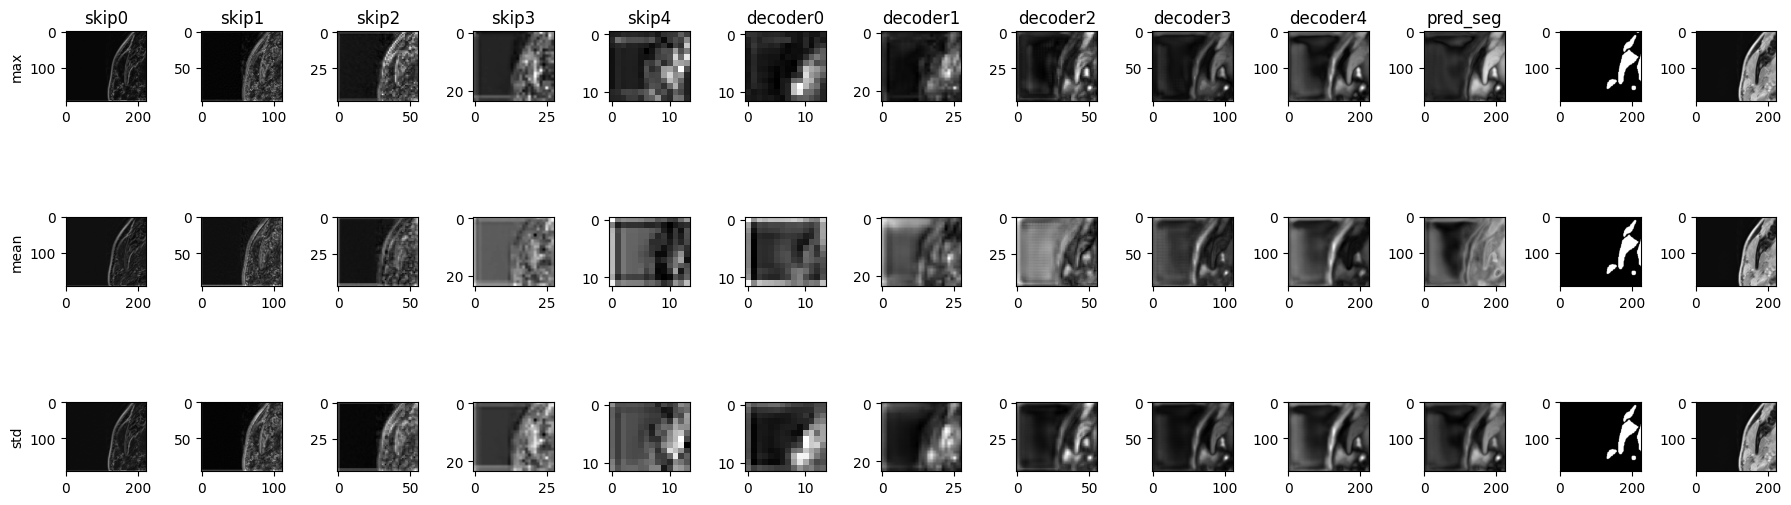

In [ ]:
B = 0
SLC = 2

t = data['target'][0][B][0].cpu().numpy().astype(bool).astype(int)

plot(activation, t, B, SLC, d[0][1].cpu().numpy())

CT

In [ ]:
pretrained = os.path.join(os.environ['nnUNet_results'], 'Dataset213_ONKOI-all-from-208/nnUNetTrainer_noMirroringAxis2redRot__nnUNetPlans__3d_fullres_modal0/fold_0/checkpoint_best.pth')

dataset_name_or_id: Union[str, int] = '213'
configuration: str = '3d_fullres_modal0'
fold: Union[int, str] = 0
trainer_class_name: str = 'nnUNetTrainer_noMirroringAxis2redRot'
plans_identifier: str = 'nnUNetPlans'
pretrained_weights: Optional[str] = pretrained
num_gpus: int = 1
use_compressed_data: bool = False
export_validation_probabilities: bool = False
continue_training: bool = False
only_run_validation: bool = False
disable_checkpointing: bool = False
device: torch.device = torch.device('cuda')
num_epochs: int = 1000

if isinstance(fold, str):
    if fold != 'all':
        try:
            fold = int(fold)
        except ValueError as e:
            print(f'Unable to convert given value for fold to int: {fold}. fold must bei either "all" or an integer!')
            raise e

nnunet_trainer = get_trainer_from_args(dataset_name_or_id, configuration, fold, trainer_class_name,
                                        plans_identifier, use_compressed_data, device=device, num_epochs=num_epochs)

if disable_checkpointing:
    nnunet_trainer.disable_checkpointing = disable_checkpointing

assert not (continue_training and only_run_validation), f'Cannot set --c and --val flag at the same time. Dummy.'

maybe_load_checkpoint(nnunet_trainer, continue_training, only_run_validation, pretrained_weights)

if torch.cuda.is_available():
    cudnn.deterministic = False
    cudnn.benchmark = True

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

Number of trainable/total parameters in M: 30.77/30.77
################### Loading pretrained weights from file  /storage/nnUnet/nnUNet_trained_models/Dataset213_ONKOI-all-from-208/nnUNetTrainer_noMirroringAxis2redRot__nnUNetPlans__3d_fullres_modal0/fold_0/checkpoint_best.pth ###################
Below is the list of overlapping blocks in pretrained model and nnUNet architecture:
encoder.stages.0.0.convs.0.conv.weight shape torch.Size([32, 1, 1, 3, 3])
encoder.stages.0.0.convs.0.conv.bias shape torch.Size([32])
encoder.stages.0.0.convs.0.norm.weight shape torch.Size([32]

In [ ]:

# nnunet_trainer.run_training()
nnunet_trainer.on_train_start()
nnunet_trainer.on_validation_epoch_start()


This is the configuration used by this training:
Configuration name: 3d_fullres_modal0
 {'data_identifier': 'nnUNetPlans_3d_fullres', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 2, 'patch_size': [40, 192, 224], 'median_image_size_in_voxels': [94.0, 459.5, 466.0], 'spacing': [2.0, 0.5, 0.5], 'normalization_schemes': ['CTNormalization', 'ZScoreNormalization'], 'use_mask_for_norm': [False, False], 'UNet_class_name': 'PlainConvUNet_modal0', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': [2, 2, 2, 2, 2, 2], 'n_conv_per_stage_decoder': [2, 2, 2, 2, 2], 'num_pool_per_axis': [3, 5, 5], 'pool_op_kernel_sizes': [[1, 1, 1], [1, 2, 2], [1, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2]], 'conv_kernel_sizes': [[1, 3, 3], [1, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3]], 'unet_max_num_features': 320, 'resampling_fn_data': 'resample_data_or_seg_to_shape', 'resampling_fn_seg': 'resample_data_or_seg_to_shape', 'resampling_fn_data_kwargs': {'is_seg': False, 'order': 3, 'order_z':

In [ ]:
d = data['data'][[0]].to('cuda:0')
activation = setup_hooks(d)

In [ ]:
for k in list(activation.keys()):
    if isinstance(activation[k], (list, tuple)):
        print(k, len(activation[k]), activation[k][0].shape)
    else:
        print(k, activation[k].shape)

skip0 (1, 32, 40, 192, 224)
skip1 (1, 64, 40, 96, 112)
skip2 (1, 128, 40, 48, 56)
skip3 (1, 256, 20, 24, 28)
skip4 (1, 320, 10, 12, 14)
decoder0 (1, 320, 10, 12, 14)
decoder1 (1, 256, 20, 24, 28)
decoder2 (1, 128, 40, 48, 56)
decoder3 (1, 64, 40, 96, 112)
decoder4 (1, 32, 40, 192, 224)
pred_seg (1, 31, 40, 192, 224)


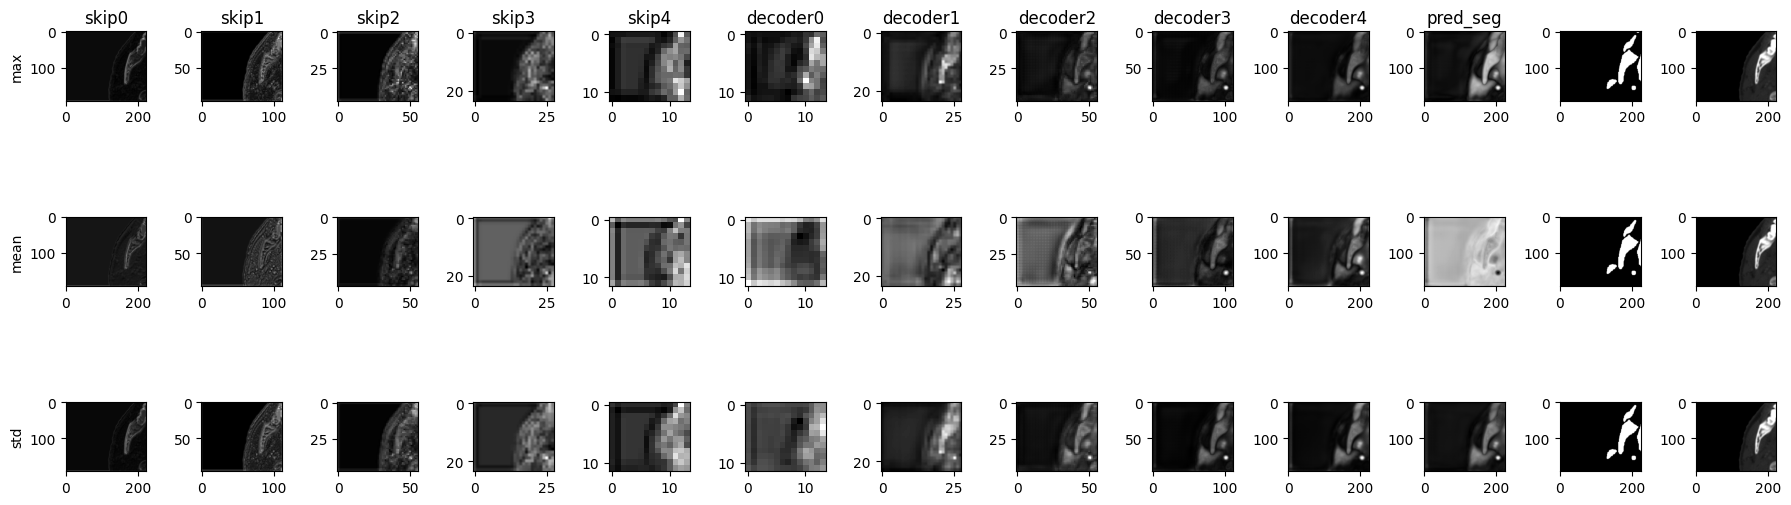

In [ ]:
t = data['target'][0][B][0].cpu().numpy().astype(bool).astype(int)

plot(activation, t, B, SLC, d[0][0].cpu().numpy())